## IMPORTING MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#IMPORTING MODELS
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#IMPORTING TOOLS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#IMPORTING METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, r2_score

In [2]:
pd.set_option('display.max_rows',75)
df = pd.read_csv("Housing _data_for_modelling.csv")
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167
MSSubClass,120.0,20.0,60.0,20.0,20.0,60.0,20.0,20.0,20.0,50.0,...,20.0,90.0,120.0,60.0,30.0,20.0,20.0,160.0,70.0,60.0
MSZoning,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0
LotFrontage,70.0,95.0,92.0,105.0,70.0,58.0,70.0,88.0,70.0,80.0,...,70.0,42.0,53.0,70.0,45.0,70.0,67.0,24.0,50.0,70.0
LotArea,4928.0,15865.0,9920.0,11751.0,16635.0,14054.0,11341.0,13125.0,9170.0,8480.0,...,11250.0,7711.0,4043.0,10762.0,8212.0,9819.0,8777.0,2280.0,8500.0,7861.0
Street,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
LotShape,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,0.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,3.0,0.0
LandContour,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Utilities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotConfig,4.0,4.0,1.0,4.0,2.0,4.0,4.0,0.0,0.0,4.0,...,4.0,4.0,4.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0
LandSlope,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# sd = StandardScaler()
# df_scale = sd.fit_transform(df)


**SPLITTING DATA**

In [4]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

**SCALING DATA**

**SPLITTING INTO TRAIN AND VAL DATA**

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [6]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((934, 74), (934,), (234, 74), (234,))

In [7]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_val = sd.transform(X_val)

## BUILDING MODEL

In [8]:
#general model performances
models = [SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(model)
    print('rscore :',r2_score(y_val, y_pred))
    print('MAE :', mean_absolute_error(y_val, y_pred))
    print('MSE :', mean_squared_error(y_val, y_pred))
    print('RMSE :',  np.sqrt(mean_squared_error(y_val, y_pred)))
    print('\n')
    

SVR()
rscore : -0.03914925369073452
MAE : 57129.05451168578
MSE : 7250158210.188264
RMSE : 85147.86086677847


DecisionTreeRegressor()
rscore : 0.5760591974974903
MAE : 28890.05982905983
MSE : 2957840636.4444447
RMSE : 54386.03346857026


KNeighborsRegressor()
rscore : 0.6316165933133218
MAE : 26009.13247863248
MSE : 2570215944.4377775
RMSE : 50697.297210381716




**ENSEMBLE TECHNIQUE**

In [9]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
print('r2score :',r2_score(y_val, y_pred))
print('MAE :', mean_absolute_error(y_val, y_pred))
print('MSE :', mean_squared_error(y_val, y_pred))
print('RMSE :',  np.sqrt(mean_squared_error(y_val, y_pred)))


r2score : 0.7867279489694878
MAE : 19515.571923076925
MSE : 1488001946.1022928
RMSE : 38574.62826913945


**BOOSTING TECHNIQUE**

In [10]:
models = [AdaBoostRegressor(base_estimator = RandomForestRegressor()), GradientBoostingRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(model)
    print('r2score :',r2_score(y_val, y_pred))
    print('MAE :', mean_absolute_error(y_val, y_pred))
    print('MSE :', mean_squared_error(y_val, y_pred))
    print('RMSE :',  np.sqrt(mean_squared_error(y_val, y_pred)))
    print('\n')

AdaBoostRegressor(base_estimator=RandomForestRegressor())
r2score : 0.8290629484098919
MAE : 18175.450683760686
MSE : 1192630090.0565686
RMSE : 34534.47683195112


GradientBoostingRegressor()
r2score : 0.800592778148234
MAE : 18602.15772563482
MSE : 1391266847.8994884
RMSE : 37299.689648836065


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
r2score : 0.8167743844817914
MAE : 19601.010082799145
MSE : 1278367564.5707517
RMSE : 35754.26638277944




## Performing hyperparameter tuning on models

**DECISION TREE REGRESSOR**

In [11]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
params_dtr = {'min_samples_split': np.arange(2, 10),
          'min_samples_leaf': np.arange(.05, .2),
          'max_leaf_nodes': np.arange(2, 30)}

dtr_grd = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 42),
                      param_grid = params_dtr,
                      cv= cv,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
dtr_grd.fit(X_train, y_train)

y_pred_dtr = dtr_grd.predict(X_val)

metric_dtr = []

metric_dtr.append(r2_score(y_val, y_pred_dtr))
metric_dtr.append(mean_absolute_error(y_val, y_pred_dtr))
metric_dtr.append(mean_squared_error(y_val, y_pred_dtr))
metric_dtr.append(np.sqrt(mean_squared_error(y_val, y_pred_dtr)))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.0s finished


In [12]:
metric_dtr

[0.6549224650275465, 30396.524805112527, 2407610566.4765773, 49067.40839372482]

**KNEIGHBORSREGRESSOR**

In [13]:
params_knr = {'n_neighbors': [2,3,4,5,6], 
              'weights': ['uniform','distance']}

knr_grd = GridSearchCV(estimator = KNeighborsRegressor(),
                      param_grid = params_knr,
                      cv= cv,
                      verbose = False,
                      scoring = 'r2',
                      n_jobs = -1)
knr_grd.fit(X_train, y_train)

y_pred_knr = knr_grd.predict(X_val)

metric_knr = []

metric_knr.append(r2_score(y_val, y_pred_knr))
metric_knr.append(mean_absolute_error(y_val, y_pred_knr))
metric_knr.append(mean_squared_error(y_val, y_pred_knr))
metric_knr.append(np.sqrt(mean_squared_error(y_val, y_pred_knr)))

C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [14]:
metric_knr

[0.6444578795879115,
 25721.839126236337,
 2480622118.7361975,
 49805.844222703396]

**RANDOMFORESTREGRESSOR**

In [15]:
params_rfr = {'n_estimators' : [50,100,200,400,500],
             'max_features' : ["auto", "sqrt", "log2"],
             'min_samples_split' : np.linspace(0.1, 1.0, 10),
              'max_depth' : [x for x in range(1,20)]}

rfr_grd = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                      param_grid = params_rfr,
                      cv= cv,
                      verbose = False,
                      scoring = 'r2',
                      n_jobs = -1)
rfr_grd.fit(X_train, y_train)

y_pred_rfr = rfr_grd.predict(X_val)

metric_rfr = []

metric_rfr.append(r2_score(y_val, y_pred_rfr))
metric_rfr.append(mean_absolute_error(y_val, y_pred_rfr))
metric_rfr.append(mean_squared_error(y_val, y_pred_rfr))
metric_rfr.append(np.sqrt(mean_squared_error(y_val, y_pred_rfr)))

C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [16]:
metric_rfr

[0.7019122022696298, 25843.077074446184, 2079762542.6722198, 45604.41363149207]

**ADABOOSTREGRESSOR**

In [33]:
params_abr = {'base_estimator' : [RandomForestRegressor()],
              'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']}

abr_grd = GridSearchCV(estimator = AdaBoostRegressor(random_state = 42),
                      param_grid = params_abr,
                      cv = cv,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
abr_grd.fit(X_train, y_train)

y_pred_abr = abr_grd.predict(X_val)

metric_abr = []

metric_abr.append(r2_score(y_val, y_pred_abr))
metric_abr.append(mean_absolute_error(y_val, y_pred_abr))
metric_abr.append(mean_squared_error(y_val, y_pred_abr))
metric_abr.append(np.sqrt(mean_squared_error(y_val, y_pred_abr)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 34.0min finished


In [34]:
metric_abr

[0.8411608537902977, 17782.499059829064, 1108222842.7739427, 33289.98111705596]

**GRADIENTBOOSTINGREGRESSOR**

In [36]:
params_gbr = {'learning_rate' : [1 ,0.1, 0.05, 0.01],
             'n_estimators' : [50, 100, 200],
             'max_depth' : np.linspace(1, 10, 20, endpoint=True),
             'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}

gbr_grd = GridSearchCV(estimator = GradientBoostingRegressor(random_state = 42),
                      param_grid = params_gbr,
                      cv = cv,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
gbr_grd.fit(X_train, y_train)

y_pred_gbr = gbr_grd.predict(X_val)

metric_gbr = []

metric_gbr.append(r2_score(y_val, y_pred_gbr))
metric_gbr.append(mean_absolute_error(y_val, y_pred_gbr))
metric_gbr.append(mean_squared_error(y_val, y_pred_gbr))
metric_gbr.append(np.sqrt(mean_squared_error(y_val, y_pred_gbr)))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 1490 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2690 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4290 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5240 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 6290 tasks      | elapsed:  9.

In [37]:
metric_gbr

[0.7661486345818689, 19132.23680154231, 1631584097.210536, 40392.87186138832]

**XGBREGRESSOR**

In [38]:
params_xgbr = {'learning_rate': [0.01, 0.1,1],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        }
xgbr_grd = GridSearchCV(estimator = XGBRegressor(random_state = 42),
                      param_grid = params_xgbr,
                      cv = cv,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
xgbr_grd.fit(X_train, y_train)

y_pred_xgbr = xgbr_grd.predict(X_val)

metric_xgbr = []

metric_xgbr.append(r2_score(y_val, y_pred_xgbr))
metric_xgbr.append(mean_absolute_error(y_val, y_pred_xgbr))
metric_xgbr.append(mean_squared_error(y_val, y_pred_xgbr))
metric_xgbr.append(np.sqrt(mean_squared_error(y_val, y_pred_xgbr)))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\mussa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  5.5min finished


In [39]:
metric_xgbr

[0.8161143153580003, 17479.580361912394, 1282972875.6559002, 35818.61074435886]

In [44]:
pred = xgbr_grd.predict(X_val)
print(pred[0], y_val[:1])

187282.61 694    196000
Name: SalePrice, dtype: int64


# METRICS TABLE

In [40]:
initial = {'Metrics' : ['R2_score', 'Mean_absolute_error', 'Mean_squared_error', 'Root_mean_squared_error'],
          'Decision Tree Regressor' : metric_dtr}
metrics_table = pd.DataFrame(initial)
metrics_table

knr = pd.Series( metric_knr,name = 'KNeighbors Regressor')
rfc = pd.Series( metric_rfr, name = 'Random Forest Regressor')
abr = pd.Series( metric_abr, name = 'Ada Boost Regressor')
gbr = pd.Series( metric_gbr, name = 'Gradient Boosting Regressor')
xgbr = pd.Series(metric_xgbr, name = 'XGBRegressor')

Metrics_table = pd.concat([metrics_table, knr, rfc, abr, gbr, xgbr],axis = 1)
Metrics_table

,Metrics,Decision Tree Regressor,KNeighbors Regressor,Random Forest Regressor,Ada Boost Regressor,Gradient Boosting Regressor,XGBRegressor
0,R2_score,6.549225e-01,6.444579e-01,7.019122e-01,8.411609e-01,7.661486e-01,8.161143e-01
1,Mean_absolute_error,3.039652e+04,2.572184e+04,2.584308e+04,1.778250e+04,1.913224e+04,1.747958e+04
2,Mean_squared_error,2.407611e+09,2.480622e+09,2.079763e+09,1.108223e+09,1.631584e+09,1.282973e+09
3,Root_mean_squared_error,4.906741e+04,4.980584e+04,4.560441e+04,3.328998e+04,4.039287e+04,3.581861e+04


**OBSERVATION**
* From all the models we can see that `GRADIENT BOOSTING REGRESSOR` performing well so finalizing  it.

**FINALIZED MODEL  :    *abr_grd('base_estimator': RandomForestRegressor(),
 'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 50)***

## TRAINING WITH THE BEST MODEL

In [66]:
%%time
ideal_model = AdaBoostRegressor(base_estimator= RandomForestRegressor(),
                                learning_rate= 1,
                                loss= 'linear',
                                n_estimators= 50)
ideal_model.fit(X_train,y_train)

Wall time: 39.4 s


AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1)

# TESTING ON TEST DATASET

In [18]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [19]:
df_test.columns.shape

(80,)

## Preprocessing same as train dataset

In [20]:
#dropping the features
def drop_features(data):
    """
    It drops the features which contains more than `40%` of missing values
    """
    percentage = dict(round(data.isna().sum()/len(data)*100,2))
    for key, values in percentage.items():
        if values > 40:
            print(f'The {key} has {values} % of missing values.')
            data = data.drop(key, axis = 1)
    return data  

In [21]:
df_test = drop_features(df_test)

The Alley has 95.21 % of missing values.
The FireplaceQu has 47.6 % of missing values.
The PoolQC has 100.0 % of missing values.
The Fence has 84.93 % of missing values.
The MiscFeature has 96.58 % of missing values.


In [22]:
#filling the missing values using simple imputer
def fill_values(data):
    """
    Fills all the missing values using simple imputer,Categorical values with the 'most frequent' values,Numerical values with the  'median' values.
    """

    for labels, content in data.items():
         # Filling the missing values of object dtype(categorical) with 'most frequent'
        if pd.api.types.is_object_dtype(content):
            if pd.isnull(content).any():
                Imputer = SimpleImputer(strategy = 'most_frequent')
                data[labels] = Imputer.fit_transform(data[labels].values.reshape(-1,1))[:,0]
        
        # Filling the missing values of the numerical dtype
        else:
            if pd.isnull(content).any():
                Imputer1= SimpleImputer(strategy = 'median')
                data[labels] = Imputer1.fit_transform(data[labels].values.reshape(-1,1))[:,0]
    return data   

In [23]:
df_test = fill_values(df_test)

In [24]:
#Converting all the features into numeric
le = LabelEncoder()

#creating function for converting the features into numerical
def convert_features(data):
    """
    Converts the categorical features into numerical features
    """
    for cols in data.columns:
        if not pd.api.types.is_numeric_dtype(data[cols]):
            data[cols] = le.fit_transform(data[cols])
    return data  

In [25]:
df_test = convert_features(df_test)

**Finding which columns are excess**

In [26]:
set(df_test.columns) - set(X.columns)

{'GarageCars', 'Id'}

In [27]:
df_test_final = df_test.drop(['GarageCars', 'Id'], axis = 1)
set(X.columns) - set(df_test_final.columns)

{'DateSold'}

In [28]:
df_test_final['DateSold'] = df_test_final['MoSold'].astype(str) + '' +  df_test_final['YrSold'].astype(str)

In [29]:
df_test_final['DateSold'] = df_test_final['DateSold'].astype('int')

In [30]:
#scaling data
sd = StandardScaler()
def scale_data(data):
    """
    It scales the data using Standard scaler 
    """
    data = sd.fit_transform(data)
    return data

In [31]:
df_test_final = scale_data(df_test_final)

**PREDICTING ON TEST DATASET**

In [67]:
predictions = ideal_model.predict(df_test_final)
predictions = pd.Series(predictions, name = 'SalePrice')

In [47]:
Final_predictions = pd.DataFrame(df_test['Id'])

In [68]:
Final_predictions = pd.concat([Final_predictions, predictions], axis = 1)

In [55]:
Final_predictions.to_csv('Machine_learning_predictions.csv')

# Saving Model

In [59]:
import joblib
joblib.dump(abr_grd, 'HousingPricesPrediction.pkl')

['HousingPricesPrediction.pkl']

# Feature Importances

In [86]:
importances = ideal_model.feature_importances_
importances

array([1.25814685e-03, 1.16436695e-03, 8.49002517e-03, 1.34871619e-02,
       6.69432363e-06, 5.68187339e-03, 3.73116455e-03, 0.00000000e+00,
       3.55419999e-03, 2.47057816e-04, 1.36816948e-02, 1.02368318e-03,
       3.49113665e-05, 1.67254257e-04, 6.69060397e-04, 4.62053784e-01,
       3.21125503e-03, 8.35194382e-03, 1.29713513e-02, 8.23531027e-04,
       1.10649027e-03, 2.38537692e-03, 1.62631579e-03, 1.15266318e-03,
       5.64461329e-02, 5.77728650e-03, 4.12595767e-04, 3.95440840e-04,
       2.06084288e-02, 1.83209791e-04, 2.62026232e-03, 1.65673643e-03,
       2.52439379e-02, 2.24568570e-04, 2.87487802e-04, 5.57733587e-03,
       4.58517891e-02, 2.79330794e-05, 7.01231712e-04, 1.08114556e-03,
       1.04962755e-04, 2.48837573e-02, 6.43772082e-02, 1.48326422e-04,
       8.43319256e-02, 1.34425443e-03, 6.49075413e-04, 8.07300789e-03,
       1.00250470e-03, 1.58282126e-03, 2.78170706e-04, 5.18983178e-03,
       8.64124581e-03, 3.56892568e-04, 7.45389132e-03, 9.98391684e-04,
      

In [101]:
##Plotting the feature importances
def plot_feature_importances(columns, importance, n ):
    data = (pd.DataFrame({'features' : columns,
                     'importances': importance})
          .sort_values('importances', ascending = False)
          .reset_index(drop = True))
          
    fig,ax = plt.subplots(figsize = (15,10))
    ax.barh(data['features'][:n], data['importances'][:n])
    ax.set_xlabel('Feature Importances', fontsize = 13)
    ax.set_ylabel('Features', fontsize = 13)  
    ax.invert_yaxis()

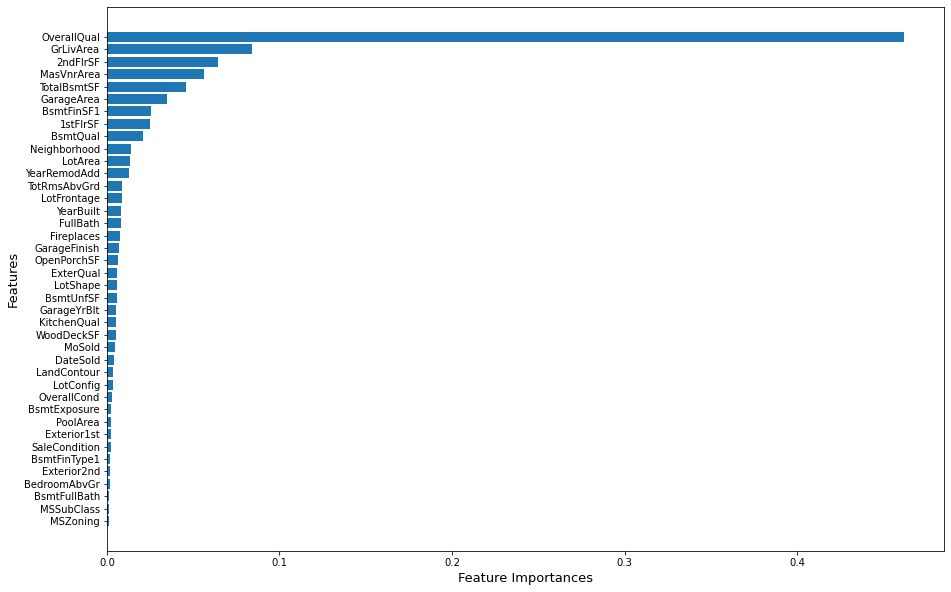

In [102]:
plot_feature_importances(columns = X.columns,importance = ideal_model.feature_importances_, n = 40 )

**OBSERVATION**
* 1. The most important feature is `OverallQual`
* 2.The secondary important features are ` GrLivArea, 2ndFloorSF,MasVnrArea, TotalBsmtsf, GarageArea, BsmtfinSF1, 1stFlSF, Bsmtqual, Neighborhood, LotArea, yearRemodadd`